In [63]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#import sys
#!conda install --yes --prefix {sys.prefix} pandas
#!conda install --yes --prefix {sys.prefix} scikit-learn
#!conda install --yes --prefix {sys.prefix} matplotlib
#!conda install --yes --prefix {sys.prefix} numpy
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler

pd.options.mode.chained_assignment = None

In [85]:
#Load dataset and show some of the data
data = pd.read_csv('./winequality-red.csv')
print(data.head(3))
print ('Total features = ' + str(len(data.keys())))

#data.loc[data.quality <= 5, 'quality'] = 0
#data.loc[data.quality >= 6, 'quality'] = 1

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
Total features = 12


In [86]:
#Divive dataset into features and classes (X and Y)
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
Y = data['quality']

In [87]:
#Utilize Principal Component Analysis to reduce 12 features to 2 and plot the data
pca = decomposition.PCA(n_components=2)
pca.fit(X)
pca_X = pca.transform(X)
print (str('% 6.4f' % np.sum(pca.explained_variance_ratio_)) + '% variance maintained.')

 0.9949% variance maintained.


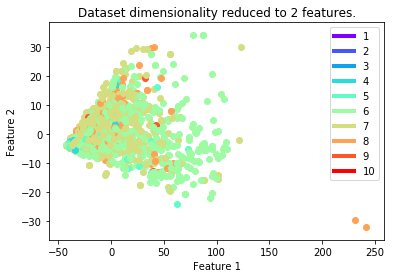

In [88]:
#Plot the data in a 2 dimension graph
ax = plt.axes()

x = np.arange(10)
ys = [i+x+(i*x)**2 for i in range(10)]

colors = cm.rainbow(np.linspace(0, 1, len(ys)))
custom_lines = []

for i in range(len(colors)):
    custom_lines.append(Line2D([0], [0], color=colors[i], lw=4))

for i in range(len(Y)):
    plt.scatter(pca_X[i, 0], pca_X[i, 1], color=colors[Y[i]])

ax.set_title('Dataset dimensionality reduced to 2 features.')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend(custom_lines, ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

In [89]:
#Utilize Principal Component Analysis to reduce 12 features to 3.
pca = decomposition.PCA(n_components=3)
pca.fit(X)
pca_X = pca.transform(X)
print (str('% 6.4f' % np.sum(pca.explained_variance_ratio_)) + '% variance maintained.')

 0.9975% variance maintained.


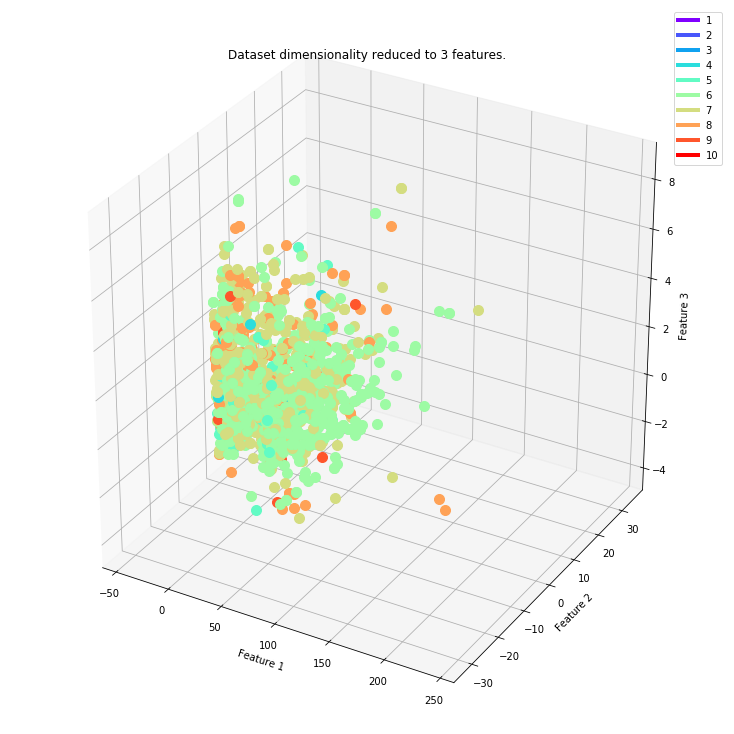

In [90]:
#Plot the data in a 3 dimension graph
fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig)
size = np.array([10, 10, 10])
for i in range(len(Y)):
    ax.scatter(pca_X[i, 0], pca_X[i, 1], pca_X[i, 2], color=colors[Y[i]], marker='o', s=100)
    
ax.set_title('Dataset dimensionality reduced to 3 features.')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend(custom_lines, ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.show();

In [91]:
sc = StandardScaler()

X = sc.fit_transform(X)

#Splits data - 70% to train the model and the 30% to test the model after training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print('X_train has ' + str(X_train.shape[0]) + ' examples')
print('X_test has ' + str(X_test.shape[0]) + ' examples')
print('Y_train has ' + str(Y_train.shape[0]) + ' classes examples')
print('Y_test has ' + str(Y_test.shape[0]) + ' classes examples')

X_train has 1279 examples
X_test has 320 examples
Y_train has 1279 classes examples
Y_test has 320 classes examples


In [92]:
logisticReg_model = LogisticRegression().fit(X_train, Y_train)
decisionTree_model = DecisionTreeClassifier().fit(X_train, Y_train)
svc_model = SVC(C=5).fit(X_train, Y_train)

print (str('Logistic Regression train score accuracy - % 6.2f' % (logisticReg_model.score(X_train, Y_train) * 100)) + '%')
print (str('Logistic Regression test score accuracy - % 6.2f' % (logisticReg_model.score(X_test, Y_test) * 100)) + '%')
print (str('Decision Tree train score accuracy - % 6.2f' % (decisionTree_model.score(X_train, Y_train) * 100)) + '%')
print (str('Decision Tree test score accuracy - % 6.2f' % (decisionTree_model.score(X_test, Y_test) * 100)) + '%')
print (str('SVC train score accuracy - % 6.2f' % (svc_model.score(X_train, Y_train) * 100)) + '%')
print (str('SVC test score accuracy - % 6.2f' % (svc_model.score(X_test, Y_test) * 100)) + '%')

Logistic Regression train score accuracy -  59.89%
Logistic Regression test score accuracy -  62.81%
Decision Tree train score accuracy -  100.00%
Decision Tree test score accuracy -  67.50%
SVC train score accuracy -  74.43%
SVC test score accuracy -  65.00%
